In [5]:
import mbuild
import foyer
import mosdef_cassandra as mc
from mosdef_cassandra.analysis import ThermoProps
import unyt as u
import matplotlib.pyplot as plt

# We'll filter out warnings. This is to improve the
# clarity of this tutorial. Please refrain to do this
# if you are not completely sure what these mean.

from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

In [6]:
# Simulation settings 

nmols = 50
temperature = 300.0
box_length = 3.0

In [7]:
# Use mBuild to create a methane molecule
methane = mbuild.load("C", smiles=True)

# Load force field
oplsaa = foyer.forcefields.load_OPLSAA()

# Use foyer to apply force field to methane
methane_ff = oplsaa.apply(methane)

# Create an empty mbuild.Box
box = mbuild.Box(lengths=[3.0, 3.0, 3.0])

# Create box and species list
box_list = [box]
species_list = [methane_ff]

# Use Cassandra to insert some initial number of methane molecules
mols_to_add = [[nmols]]

# Define the System
system = mc.System(box_list, species_list, mols_to_add=mols_to_add)
# Define the MoveSet
moveset = mc.MoveSet("nvt", species_list)

# Run a simulation
mc.run(
    system=system,
    moveset=moveset,
    run_type="equilibration",
    run_length=10000,
    temperature=temperature * u.K,
)

Using the following executables for Cassandra:
Python: /home/emarinri/miniconda3/envs/cassandra/bin/python
library_setup: /home/emarinri/miniconda3/envs/cassandra/bin/library_setup.py
Cassandra: /home/emarinri/miniconda3/envs/cassandra/bin/cassandra.exe
Generating fragment libraries...
Running Cassandra...


Text(0, 0.5, 'Total Energy (kJ/mol)')

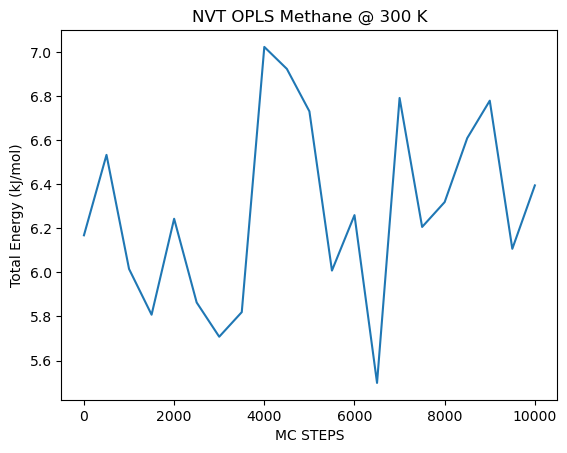

In [8]:
# Let's plot the results

thermo = ThermoProps(f"nvt.out.prp")
energy = thermo.prop("Energy_Total") / nmols
pressure = thermo.prop("Pressure")
steps = thermo.prop("MC_STEP")
plt.plot(steps, energy, label="Total System Energy")
plt.title("NVT OPLS Methane @ 300 K")
plt.xlabel("MC STEPS")
plt.ylabel("Total Energy (kJ/mol)")